In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
X, y = make_moons(n_samples=300, noise=0.08, random_state=42)

In [4]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

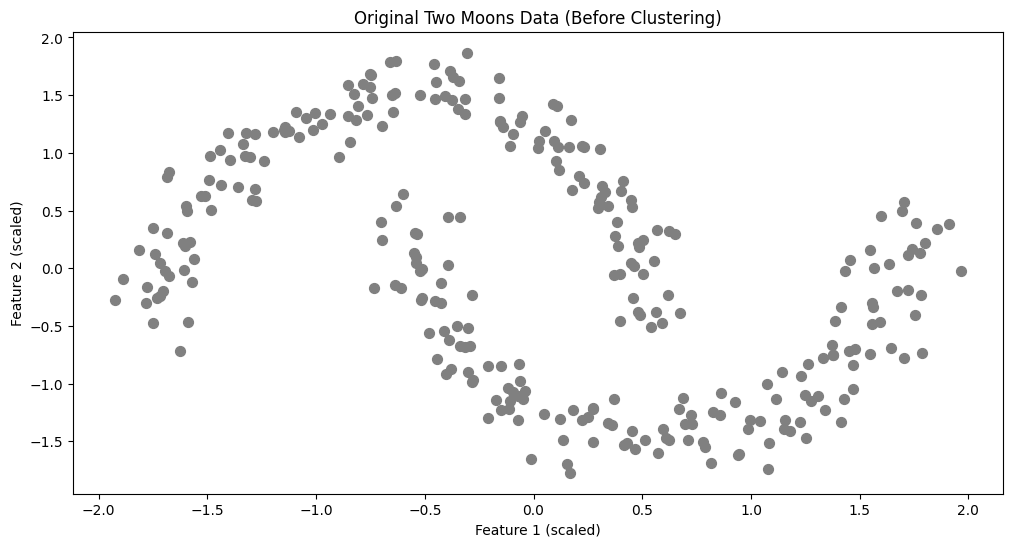

In [5]:
# Plot original data
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c='gray', s=50)
plt.title("Original Two Moons Data (Before Clustering)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

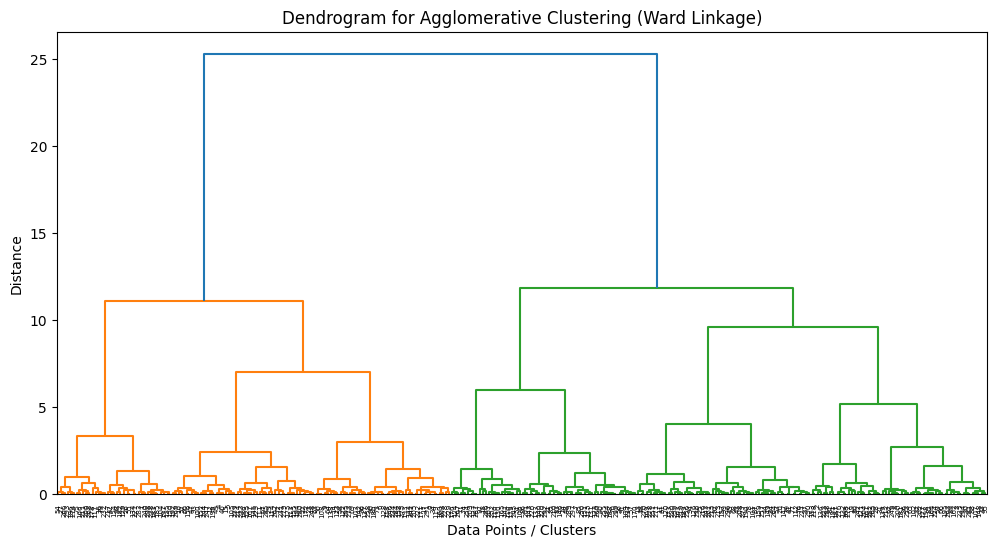

In [8]:
# Create linkage matrix for dendrogram
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Dendrogram for Agglomerative Clustering (Ward Linkage)")
plt.xlabel("Data Points / Clusters")
plt.ylabel("Distance")
plt.show()

**Interpretation:**

- Each leaf = one data point.
- Vertical height = distance at which clusters merged.
- Large vertical gaps suggest natural cluster separations.

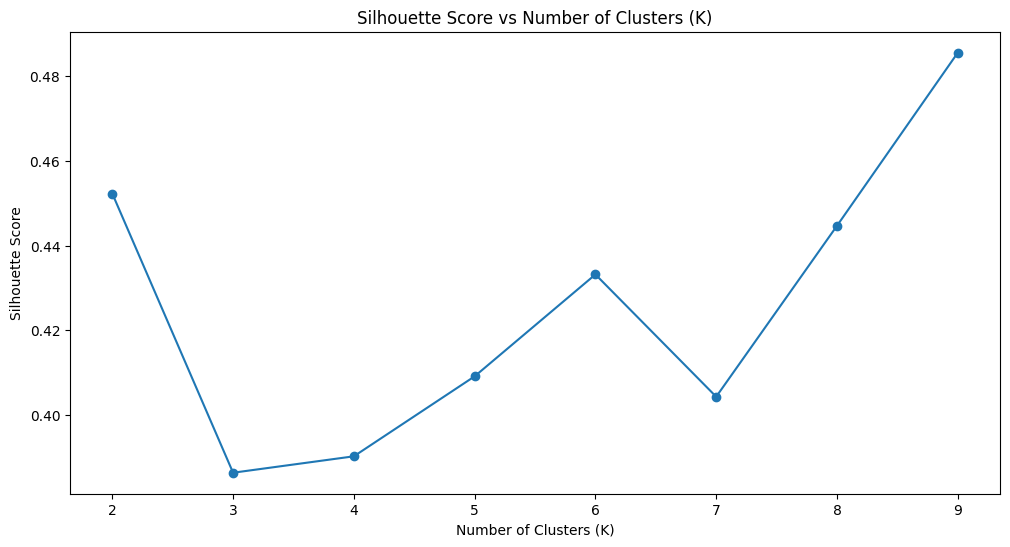

Optimal K based on Silhouette Score: 9


In [11]:
# Try multiple K values and compute Silhouette Scores
from sklearn.metrics import silhouette_score

sil_scores = []
K_range = range(2, 10)

for k in K_range:
    model = AgglomerativeClustering(n_clusters=k, linkage='complete')
    labels = model.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

# Plot Silhouette Scores
plt.figure(figsize=(12,6))
plt.plot(K_range, sil_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

best_k = K_range[np.argmax(sil_scores)]
print(f"Optimal K based on Silhouette Score: {best_k}")

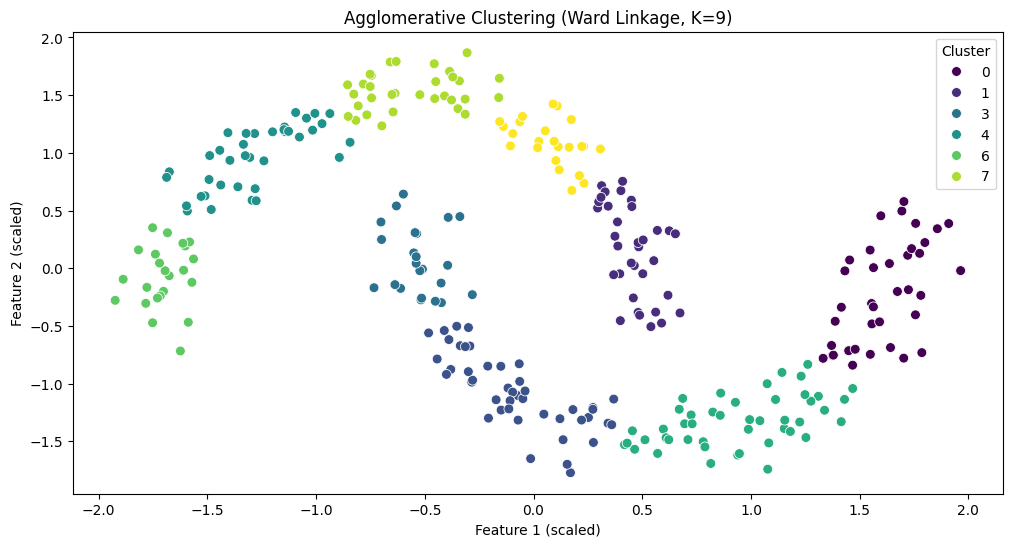

In [ ]:
# Apply Agglomerative Clustering
agg_model = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
labels = agg_model.fit_predict(X_scaled)

# Visualize clustered data
plt.figure(figsize=(12,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette='viridis', s=50)
plt.title(f"Agglomerative Clustering (Ward Linkage, K={best_k})")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend(title="Cluster")
plt.show()

**Interpretation:**

- Clusters now follow the crescent shapes of the moons.
- Agglomerative clustering handles non-convex clusters, unlike K-Means.
- Each color = one cluster.